In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import datetime as dt
from matplotlib.colors import ListedColormap
%matplotlib inline
from dash import dcc
from dash import html
from itertools import chain
from collections import Counter
from dash.dependencies import Input, Output

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# df = pd.read_csv('D:\Project\df.csv')
# dfd = pd.read_csv('D:\Project\dfd.csv')
# dfc = pd.read_csv('D:\Project\dfc.csv')
# ndfc = pd.read_csv('D:\Project\dfcc.csv')
# ndfd = pd.read_csv('D:\Project\dfdd.csv')
# del dfd['Unnamed: 0']
# del dfc['Unnamed: 0']
# del ndfc['Unnamed: 0']
# del ndfd['Unnamed: 0']
# dfc.drop(dfc.head(80).index,inplace=True)
# dfd.drop(dfd.head(80).index,inplace=True)
# ndfc.drop(ndfc.head(80).index,inplace=True)
# ndfd.drop(ndfd.head(80).index,inplace=True)
# dfc.drop(dfc.tail(20).index,inplace=True)
# dfd.drop(dfd.tail(20).index,inplace=True)
# ndfc.drop(ndfc.tail(20).index,inplace=True)
# ndfd.drop(ndfd.tail(20).index,inplace=True)
#dfcsr = pd.read_csv('D:\dfcsr.csv')
#dfdsr = pd.read_csv('D:\dfdsr.csv')
#del dfcsr['Unnamed: 0']
#del dfdsr['Unnamed: 0']
#del dfdsr['nu']
#del dfcsr['nu']
# del dfc['Cases_on_an_international_conveyance_Japan']
# del dfd['Cases_on_an_international_conveyance_Japan']

In [4]:
dfd = pd.read_csv('D:\Project\dfdd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']
dfd['nu'] = 0
dfd['nu'] = dfd.index

dfc = pd.read_csv('D:\Project\dfcc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']
dfc['nu'] = 0
dfc['nu'] = dfc.index

df = pd.read_csv('D:\Project\owid-covid-data.csv')

In [5]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe,nu
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0,150
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0,151
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0,152
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0,153
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0,703
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0,704
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0,705
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0,706


In [6]:
allcountli = list(dfc.columns)
allcountli.pop(0)
allcount = allcountli
for i in range(len(allcount)):
    allcount[i] = html.Option(value=allcount[i])

In [7]:
the_number_of_cases = dcc.RangeSlider(
    id='value-cases',
    min=150,
    max=707,
    value=[150, 707]
)


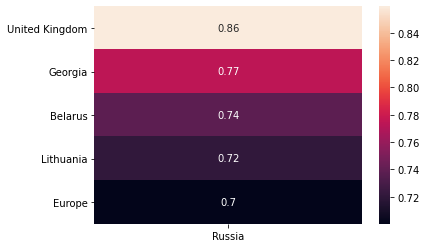

In [8]:
lisc = list(dfc.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfc.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [ ]:
corlist = dfc.columns
dfcsr = dfc.copy(deep=True)
dfdsr = dfd.copy(deep=True)
for i in corlist:
    for j in range(554):
        dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
for i in corlist:
    for j in range(554):
        dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

C:\Users\user01\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-9-e674f1c64e0d>:6: RuntimeWarning: invalid value encountered in double_scalars
  dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
<ipython-input-9-e674f1c64e0d>:9: RuntimeWarning: invalid value encountered in double_scalars
  dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))


In [ ]:
dfcsr

In [ ]:
trace1 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr['Russia'],
        name='cases',
        yaxis='y2'
    )
trace2 = go.Scatter(
        x=dfd['nu'],
        y=dfdsr['Russia'],
        name='death',
        yaxis='y2'
    )
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2, secondary_y=True)
fig['layout'].update(height=600, width=800, xaxis=dict(
        tickangle=45
    ))
fig.update_yaxes(range=[0, 1])
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig.show()

In [ ]:

trace3 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr['Russia'],
        name='Russia',
        yaxis='y2'
    )
trace4 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[0].name],
        name=cd.iloc[0].name,
        yaxis='y2'
    )
trace5 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[1].name],
        name=cd.iloc[1].name,
        yaxis='y2'
    )
trace6 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[2].name],
        name=cd.iloc[2].name,
        yaxis='y2'
    )
trace7 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[3].name],
        name=cd.iloc[3].name,
        yaxis='y2'
    )
trace8 = go.Scatter(
        x=dfc['nu'],
        y=dfcsr[cd.iloc[4].name],
        name=cd.iloc[4].name,
        yaxis='y2'
    )
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(trace3)
fig3.add_trace(trace4)
fig3.add_trace(trace5)
fig3.add_trace(trace6)
fig3.add_trace(trace7)
fig3.add_trace(trace8)
fig3['layout'].update(height=600, width=800, xaxis=dict(
        tickangle=45
    ))
fig3.update_yaxes(range=[0, 1])
fig3.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig3.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
fig3.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
fig3.show()

In [ ]:
lisc = list(dfc.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfc.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [ ]:
fig2 = px.imshow(cd)
fig2.update_layout(width=500, height=600, margin=dict(l=200, r=200, b=100, t=100))

In [ ]:
# dfc = dfc.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #лагорифмирует все значения из датафреймов
# dfd = dfd.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #очень плохо реагирует на нули так как лагорифма его нет


In [ ]:
# massiv = [0]*213
# for i in range(213):
#     massiv[i] = dfc.corr()['Afghanistan'].iloc[i]
# massivsor = sorted(massiv, reverse = True)[1:6]
# massivsor
# data = np.asarray(massivsor).reshape(5,1) 
# sns.heatmap(data, annot = True)
# plt.show() 

In [ ]:
app = dash.Dash(__name__)

In [ ]:
app.layout = html.Div([
    html.Div(children=[
        html.H1(children='График роста и спада заболеваемости',style={
            'textAlign': 'center',
        }),
        
        
        dcc.Graph(id='num-of-cas',
                  figure=fig),
        html.Div(children='Срок, за который вы хотите видеть рост/спад заболеваемости (в месяцах)',style={
            'textAlign': 'center'}),
        html.Div(the_number_of_cases,
                 style={'width': '400px',
                        'margine-bottom': '40px'}),
        html.Div('Какю страну вы хотите увидеть?'),
        dcc.Input(
            id='txtinput',
            type='text',
            pattern=r"^[A-Za-z].*",
            list='browser',
            autoFocus=True,
            value='Russia'
        ),
    ], style={'padding': 10, 'flex': 1, "top": "50%",
                        "left": "50%"}),
    
        html.Div(children=[
        html.H1(children='График стран с которыми наиболее коррелирует ',style={
            'textAlign': 'center',  
        }),
            
            
        dcc.Graph(id='figure3',
                  figure=fig3)
        
    ]),
    
    
        html.Div(children=[
        dcc.Graph(id='cor',
                  figure=fig2)
        
    ] ,style={'padding': 10, 'flex': 1, "top": "50%",
                        "left": "50%",
                 'justify-content': 'center',
  'align-items': 'left', 'margin': 'auto'
              }),
        
    
    html.Datalist(id='browser', children=allcount),
    #     html.Div([
    #         dcc.Graph(id='num-of-cas1', figure=fig) #возможно
    #     ]),
],style={'alignitems': 'center','display': 'flex', 'flex-direction': 'row'})

In [ ]:
# @app.callback(
#     Output(component_id='num-of-cas', component_property='figure'),
#     Output(component_id='cor', component_property='figure'),
#     Input(component_id='value-cases', component_property='value'),
#     Input(component_id='txtinput', component_property='value'),
# )
# def update_num_of_cas(loh,con):
#     w=dfc[loh[0]:loh[1]]
#     ww=dfd[loh[0]:loh[1]]
    
#     w['sym']='Заболевшие'
#     ww['sym']='Погибших'
    
#     fig = px.line(w,y=con,symbol='sym')
#     fig1=px.line(ww,y=con,symbol='sym')
    
#     fig.update_traces(line_color="#008000", selector=dict(type='scatter'), mode='lines')
#     fig1.update_traces(line_color="#ff0000", selector=dict(type='scatter'), mode='lines')
    
#     fig = go.Figure(data = fig.data + fig1.data)
    
#     return fig

In [ ]:
@app.callback(
    Output(component_id='num-of-cas', component_property='figure'),
#     Output(component_id='cor', component_property='figure'),
    Input(component_id='value-cases', component_property='value'),
    Input(component_id='txtinput', component_property='value'),
)
def update_num_of_cas(slider,con):
    w=dfcsr[slider[0]:slider[1]] 
    ww=dfdsr[slider[0]:slider[1]]
    
    trace1 = go.Scatter(
        x=w['nu'],
        y=w[con],
        name='cases',
        yaxis='y2'
    )
    trace2 = go.Scatter(
        x=ww['nu'],
        y=ww[con],
        name='death',
        yaxis='y2'
    )
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2, secondary_y=True)
    fig['layout'].update(height=600, width=800, xaxis=dict(
        tickangle=45
    ))
    fig.update_yaxes(range=[0, 1])
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    
    return fig

In [ ]:
@app.callback(
    Output(component_id='cor', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_heatmap(con):
    lisc = list(dfc.columns)
    inp=con #Afghanistan
    inpcol=lisc.index(inp)
    c = dfc.corr()
    cd=c.iloc[:,[inpcol]]
    cd=cd.sort_values(by=inp,ascending=False)
    cd=cd[1:6]
    sns.heatmap(cd,annot=True) # vmin=0,vmax=1
    fig2 = px.imshow(cd)
    fig2.update_layout(width=500, height=600, margin=dict(l=200, r=200, b=100, t=100))
    
    return fig2

In [ ]:
@app.callback(
    Output(component_id='figure3', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_num_of_cas(con):
    lisc = list(dfc.columns)
    inp=con #Afghanistan
    inpcol=lisc.index(inp)
    c = dfc.corr()
    cd=c.iloc[:,[inpcol]]
    cd=cd.sort_values(by=inp,ascending=False)
    cd=cd[1:6]
    sns.heatmap(cd,annot=True) # vmin=0,vmax=1
    fig2 = px.imshow(cd)
    fig2.update_layout(width=500, height=600, margin=dict(l=200, r=200, b=100, t=100))
    
    
    trace3 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[con],
            name=con,
            yaxis='y2'
        )
    trace4 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[0].name],
            name=cd.iloc[0].name,
            yaxis='y2'
        )
    trace5 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[1].name],
            name=cd.iloc[1].name,
            yaxis='y2'
        )
    trace6 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[2].name],
            name=cd.iloc[2].name,
            yaxis='y2'
        )
    trace7 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[3].name],
            name=cd.iloc[3].name,
            yaxis='y2'
        )
    trace8 = go.Scatter(
            x=dfc['nu'],
            y=dfcsr[cd.iloc[4].name],
            name=cd.iloc[4].name,
            yaxis='y2'
        )
    fig3 = make_subplots(specs=[[{"secondary_y": True}]])
    fig3.add_trace(trace3)
    fig3.add_trace(trace4)
    fig3.add_trace(trace5)
    fig3.add_trace(trace6)
    fig3.add_trace(trace7)
    fig3.add_trace(trace8)
    fig3['layout'].update(height=600, width=800, xaxis=dict(
            tickangle=45
        ))
    fig3.update_yaxes(range=[0, 1])
    fig3.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    fig3.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='blue', size=12))
    fig3.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, gridcolor='LightPink')
    
    return fig3

In [ ]:
if __name__ == '__main__':
    app.run_server(use_reloader=False)

In [ ]:
# fig = px.imshow(cd)
# fig.update_layout(width=200, height=300, margin=dict(l=10, r=10, b=10, t=10))
# fig.show()

In [ ]:
dfdsr.to_csv('dfdsr.csv')

In [ ]:
dfc.index